# Kardiyovasküler Hastalığının Teşhisi

#### Mücahit FINDIK 
#### Mert IŞIK

Bu proje raporu boyunca kardiyovasküler hastalığı tespit etmeye çalışacağız. Bu hastalık dünyada her yıl milyonlarca insanın ölümüne neden oluyor. Hastalık sürecindeki erken tedavinin önemi gün geçtikçe arttığından, veritabanımızdaki özellikleri kullanarak bu hastalığı tespit etmeye çalışacağız. Bunun için veritabanımızda 70000 farklı örneği farklı algoritmalar kullanarak inceleyeceğiz. Yapacağımız ilk şey verilerimizi incelemektir. Daha sonra uygun algoritmaları deneyerek modeller oluşturacağız. Bu modelleri karşılaştırarak en iyi çalışma modelimizi bulacağız.

## İçerik

[Problem](#problem)   
[Verinin Anlaşılması](#data_understanding)   
[Verilerin Hazırlanması](#data_preparation)   
[Modelleme](#modeling)   
[Değerlendirme](#evaluation)   
[Referanslar](#references)   


## Problem <a class="anchor" id="problem"></a>

Projemizde kardiyovasküler hastalık riski olan kişileri tanımlamayı hedefliyoruz. Dünya Sağlık Örgütü'nün verilerine göre, dünyadaki bulaşıcı olmayan hastalıkların neden olduğu ölümlerin% 46.2'sine (17.5 milyon) kardiyovasküler hastalıkların neden olduğu 22.2 milyona yükseleceği tahmin edilmektedir. . Amacımız bunu alt edebilecek bir sistem yaratmak. Bunun için çeşitli makine öğrenme algoritmaları ve veri bilimi tekniklerini kullanacağız.

## Verinin Anlaşılması<a class="anchor" id="data_understanding"></a>

In [2]:
from zipfile import ZipFile
filename="cardiovascular-disease-dataset.zip"
with ZipFile(filename,"r") as zp:
  zp.extractall()
  print("Done") 

Done


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
from tqdm import tqdm_notebook as tqdm
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import itertools
from sklearn.metrics import classification_report
from IPython.display import Image

C:\Users\muco\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Kaggle'dan 7000 sütunu ve 11 bağımsız değişkeni olan veri kümesini kullandık.Bu veri kümesi özellikleri; yaş (gün), boy, kilo, cinsiyet, sistolik kan basıncı, diyastolik kan basıncı, kolesterol, glikoz, sigara, alkol alımı, fiziksel aktivite. Tüm veri seti değerleri tıbbi muayene sırasında toplanmıştır.

In [0]:
df = pd.read_csv("/content/cardio_train.csv",sep=';')

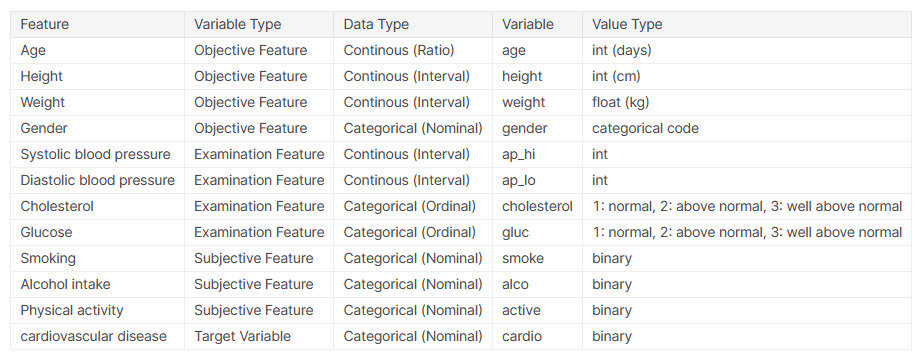

In [3]:
Image(filename = "dataFeatures.jpg", width=1000, height=1000)

In [0]:
df.head(7)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0


In [0]:
#shape of the data
df.shape

(70000, 13)

Veri setimizde boş bir değer yok. Aşağıdaki kod bloğu bunu kontrol ediyor.

In [0]:
#empty values check in each column
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Tüm özelliklerin veri türleri sayısaldır.

In [0]:
print ("features data type: \n", df.dtypes)

features data type: 
 id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


In [0]:
#several statistics information
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Veri setimizin dengeli olduğunu aşağıda gösterdik. Kardiyovasküler hastalığı olan ve olmayanlar arasında eşitlik vardır.

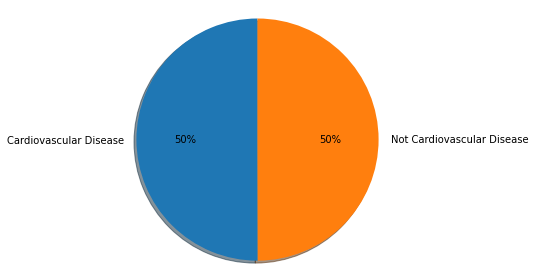

In [0]:
fig1, ax1 = plt.subplots()
ax1.pie(df['cardio'].value_counts().to_numpy(), labels=['Cardiovascular Disease','Not Cardiovascular Disease'], autopct='%0.f%%', shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## Verilerin Hazırlanması <a class="anchor" id="data_preparation"></a>

'Age' veri türü yıllar yerine günlerdir. Bu türü 'years' çevirdik. Sonra veri setimizin 'years' (yıllara) göre dağılımını gösterdik.

In [0]:
#age data type is days so conver to years
df['years'] = (df['age']/365).round(0)
df['years'] = pd.to_numeric(df['years'])

Veri setimizde 30-65 yaş arası insanlar var. Kardiyovasküler olmayanların sayısı 55 yaşına kadar veri setimizde kardiyovasküler olanlardan daha fazladır. Ancak 55 yaşın üzerindeki yaşlarda, tam tersini söyleyebiliriz.

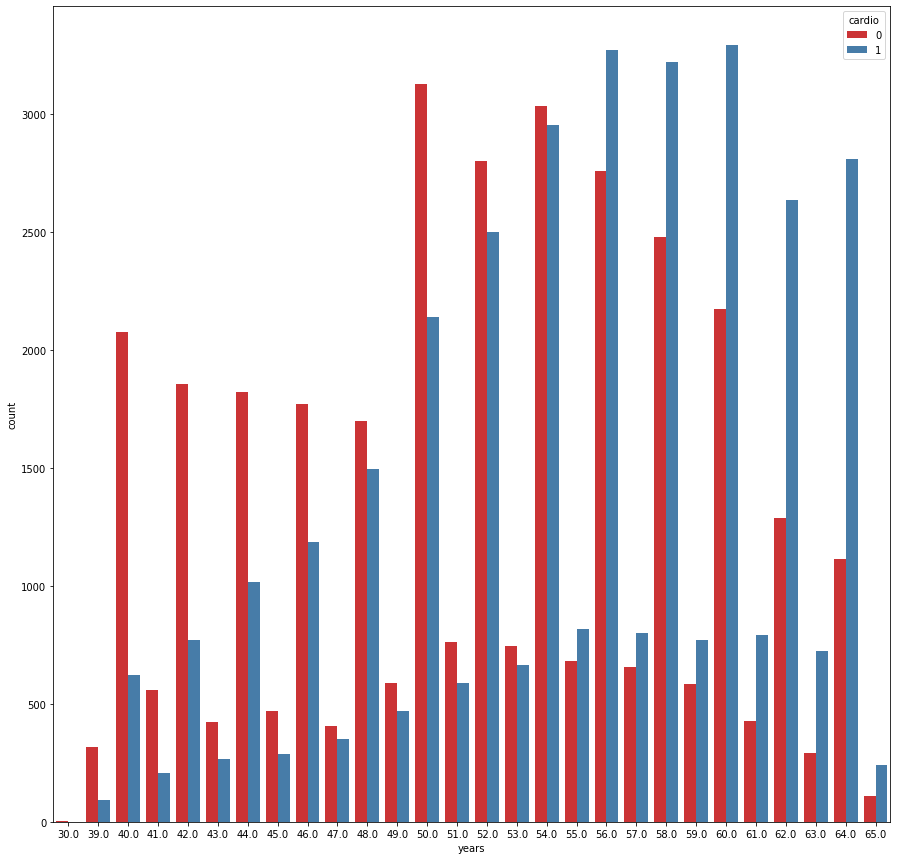

In [0]:
#visualize according to age
plt.figure(figsize=(15,15))
sns.countplot(x = 'years', hue = 'cardio', data=df, palette = 'Set1')

Özellikler arasındaki korelasyonu inceledik. 'years' ve 'age' arasındaki korelasyon dikkatimizi çekti. Aşağıdaki şekle göre aynıdırlar. Çünkü aralarındaki ilişki yüzde 100'dür. Yani birini kaldırmak zorundayız. 'years' özelliğini kaldırmayı seçtik.

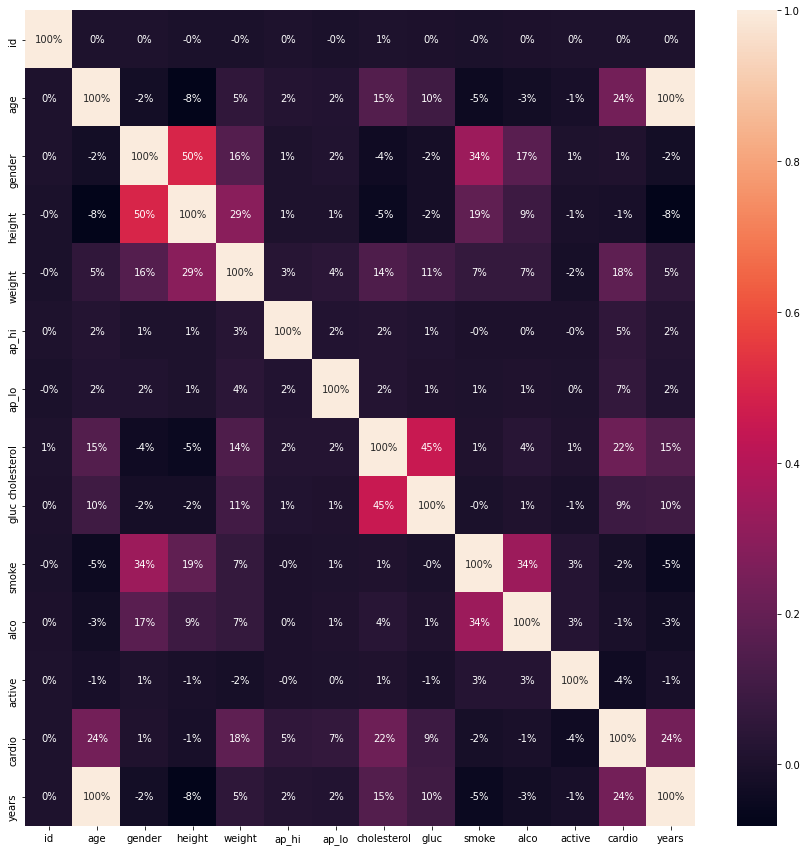

In [0]:
plt.figure(figsize=(15,15))
corr=df.iloc[:,:].corr()
sns.heatmap(corr,annot=True,fmt='.0%')

In [0]:
#According to above the figure years is ineffecient because years and age are same so we should remove years or ages column
df = df.drop('years',axis=1)

In [0]:
df = df.drop('id',axis=1)# id feature is not important for us

In [0]:
df_data=df.drop('cardio',axis=1)# drop target value

In [0]:
#Train and test are split
X_train, X_test, Y_train, Y_test = train_test_split(df_data, df.cardio, test_size=0.20, random_state=1)

Önemli özellikleri bulmak için random forest algoritmasını kullandık. Öncelikle verilerimizi bu modele sığdırıyoruz. Bu algoritmada dikkate alınması gereken n_estimators parametresi. Çünkü bu parametre Random Forest ağacındaki dalları ifade eder. Bu sayı arttıkça, model daha karmaşık hale gelir. Bu değeri kullandık çünkü 1000 daha büyük değer verdiğimizde bellek hatası aldık.

In [0]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=1000, random_state=0)

# Train the classifier
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
features = df_data.columns

In [0]:
#We showed features and them importances according to random forest
imp = []
for feature in zip(features, clf.feature_importances_):
    imp.append(feature)

sorted_importance = sorted(imp, key=lambda tup: tup[1])

Random Forest algoritmasına göre 'age' özelliği bizim için çok önemlidir. Ayrıca diğer özelliklerin önemini gösterdik. Bu bilgileri modelleme adımı için kullanacağız.

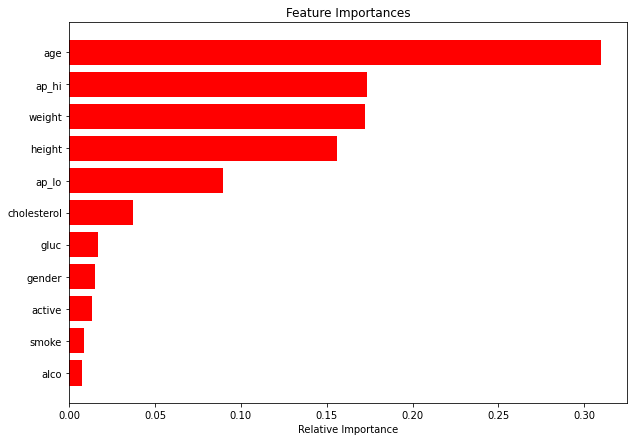

In [0]:
fname = [top[0] for top in sorted_importance]
fvalue = [top[1] for top in sorted_importance]

plt.figure(figsize=(10,7))
plt.title('Feature Importances')
plt.barh(range(len(sorted_importance)), fvalue, color='r', align='center')
plt.yticks(range(len(sorted_importance)), fname)
plt.xlabel('Relative Importance')
plt.show()

## Modelleme <a class="anchor" id="modeling"></a>

Bu projede üç model kullanıyoruz. Bu algoritmalar KNN, Decision Tree, Random Forest' dır. Başlangıçta KNN algoritmasını kullanmaya başladık ama bu bizim için yeterli değildi. KNN algoritması kullanılarak eğitilen bu modelin doğruluğu düşüktü. Bu nedenle diğer algoritmaları denedik. Bu bölümde ve bir sonraki bölümde neden diğer algoritmaları kullandığımızdan bahsettik.

İlk olarak KNN algoritmasını kullanıyoruz. Çünkü bu teknik çok basit ve hızlı. Bu algoritma, hedef değere karar vermek için Öklid Uzaklığı gibi mesafe işlevini kullanır. K değerleri, bu algoritma tarafından bakılan nokta sayısını ifade eder.

In [0]:
knn_accuracy = []
for k in range(1,27):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, Y_train)
    knn_accuracy.append(round(knn_classifier.score(X_test, Y_test),4))

Bundan sonra decision tree algoritmasını kullanmaya karar verdik. Decision tree algoritmasını denedik, çünkü önemsiz özellikleri ortadan kaldırarak daha kolay bir sınıflandırma oluşturmak istedik.

max_depth, decision tree algoritması için en önemli parametredir. Çünkü ağacın seviyesini veya derecesini belirler. Bu parametre kullanılarak oluşturulan model, ona bağlı olarak karmaşık veya basit bir model haline gelebilir. Karmaşık bir model takılabilir veya basit bir model takılabilir.

Başka bir parametre 'ölçüt'tür. Bu parametre, verileri bölmek için hesaplama türüne karar verir. Bunun için iki seçeneğimiz var. Gini safsızlığının eşitliği 'gini'dir ve' bilgi kazancı '' entropi 'olarak ifade edilir. Gini Safsızlığı, bir gözlemin yanlış sınıflandırılması olasılığına karşılık gelir. Bilgi kazancı, bir özelliğin sınıfı ne kadar iyi böldüğünü ölçer.

In [0]:
pipe_steps = [('decsT', DecisionTreeClassifier())]

check_params = {'decsT__criterion':['gini', 'entropy'], 
               'decsT__max_depth': np.arange(3, 15)}

pipeline = Pipeline(pipe_steps)

Bu parametrelere karar vermek için grid-search tekniğini kullandık.

In [0]:
for cv in tqdm(range(3, 6)):
    create_grid = GridSearchCV(pipeline, param_grid=check_params)
    create_grid.fit(X_train, Y_train)
    print (create_grid.best_params_)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


{'decsT__criterion': 'gini', 'decsT__max_depth': 6}
{'decsT__criterion': 'gini', 'decsT__max_depth': 6}
{'decsT__criterion': 'gini', 'decsT__max_depth': 6}



Grid-search algoritması 'max_depth'i 6 ve 'criterion'ı gini olarak belirlemiştir.

Verilerimizi yerleştirdik ve aşağıdaki şekilde gösterilen ağacı gösterdik. Özelliklerin önemini inceledik. En önemli özellikler sistolik kan basıncı, yaş, kolesterol ...

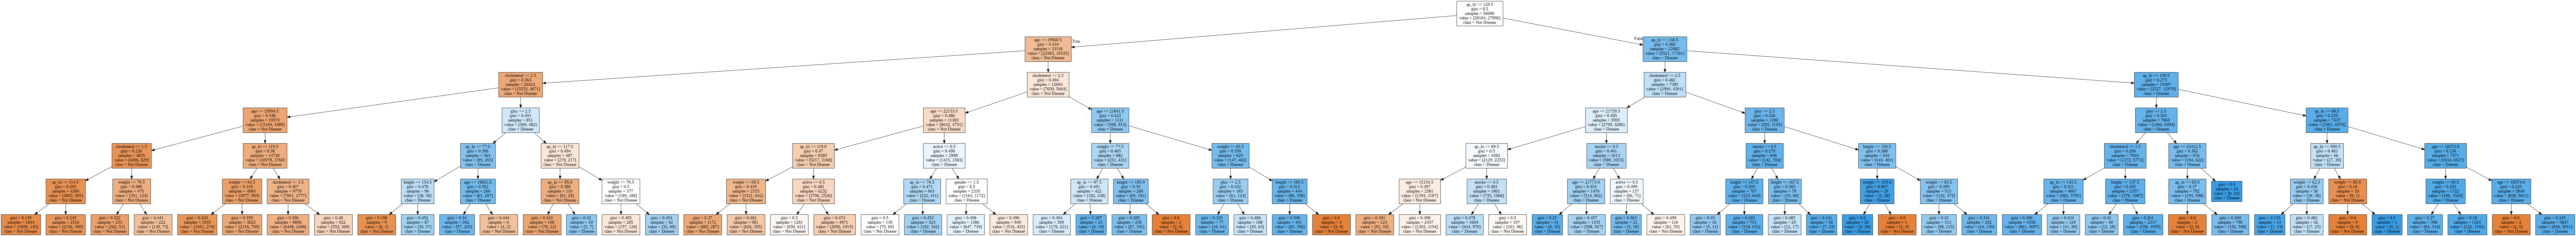

In [0]:
DecsTree = DecisionTreeClassifier(criterion='gini', max_depth=6)
DecsTree.fit(X_train, Y_train)

dot_data  = StringIO()

export_graphviz(DecsTree, out_file=dot_data,  
                filled=True,
                feature_names = df_data.columns.values, class_names=['Not Disease','Disease'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Text(0, 0.5, 'Feature Importance')

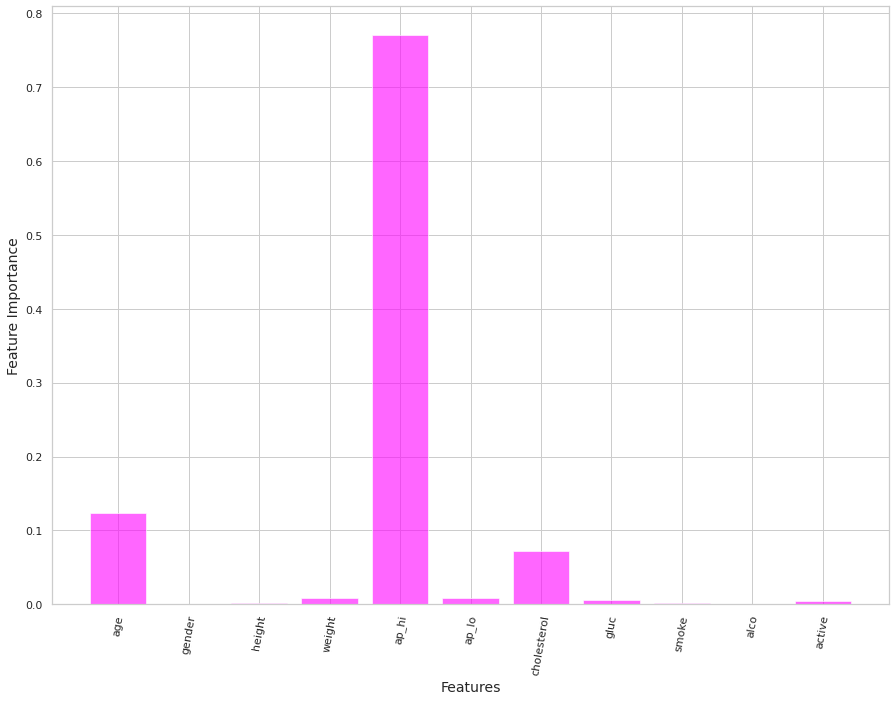

In [0]:
n_features = len(df_data.columns.values)

sns.set(style="whitegrid")

fig = plt.figure(figsize=(15, 11))
fig.tight_layout()
plt.bar(range(n_features), DecsTree.feature_importances_, color="magenta", align="center", alpha=0.6)
plt.xticks(np.arange(n_features), df_data.columns.values, rotation=80, fontsize=11)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Feature Importance", fontsize=14)

Random Forest, eşik olarak özelliklerin kolayca seçilmesini sağlar. Bunun için bu algoritmayı kullanmaya karar verdik. Veri Hazırlama bölümünde, Random Forest sınıflandırmasını kullanarak çeşitli özellikler seçtik. Şimdi bu özellikleri verilerimizi sınıflandırmak için kullanacağız.

In [0]:
sfm = SelectFromModel(clf, threshold=0.01)

# Train the selector
sfm.fit(X_train, Y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=1000, n_jobs=None,
                                                 oob_score=False

Bu özellikleri 0.01 eşiği kullanarak kısıtladık. Sonra modeli train veri setimizle eğittik. Random Forest algoritmasına göre, en önemli özellikler yaş cinsiyet boy kilo sistolik tansiyon diyastolik kan basıncı kolesterol glukoz fiziksel aktivite


In [0]:
for feature_list_index in sfm.get_support(indices=True):
    print(X_train.columns[feature_list_index])

age
gender
height
weight
ap_hi
ap_lo
cholesterol
gluc
active


Verilerimizi yukarıda belirtilen özelliklere göre dönüştürdük. Sonra 9 özelliğe sahip bu verilerle Random Forest
modelini eğittik.

In [0]:
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [0]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=1000, random_state=0)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Değerlendirme <a class="anchor" id="evaluation"></a>

In [0]:
classNames = ['Not Cardiovacular Disease','Cardiovascular Disease']
def showConfusionMatrix(X_test,Y_test,model):
  classifier_prediction = model.predict(X_test)
  cm_test = confusion_matrix(Y_test, classifier_prediction)
  plt.clf()
  plt.imshow(cm_test, interpolation='nearest', cmap=plt.cm.Wistia)
  plt.title('Detect Cardiovascular Disease Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm_test[i][j]))
  plt.show()
  print("Accuracy on test set : "+str(accuracy_score(Y_test,classifier_prediction)*100))

Bu algoritmanın k değeri 23 olduğunda en yüksek doğruluk 70,9'dur. Doğruluk değerleri k = 23'e kadar kademeli olarak artar. Ancak bu değerden sonra doğruluk değeri azalmaya başlar.

Text(0.5, 1.0, 'K Neighbors Classifier accuracy for different K values')

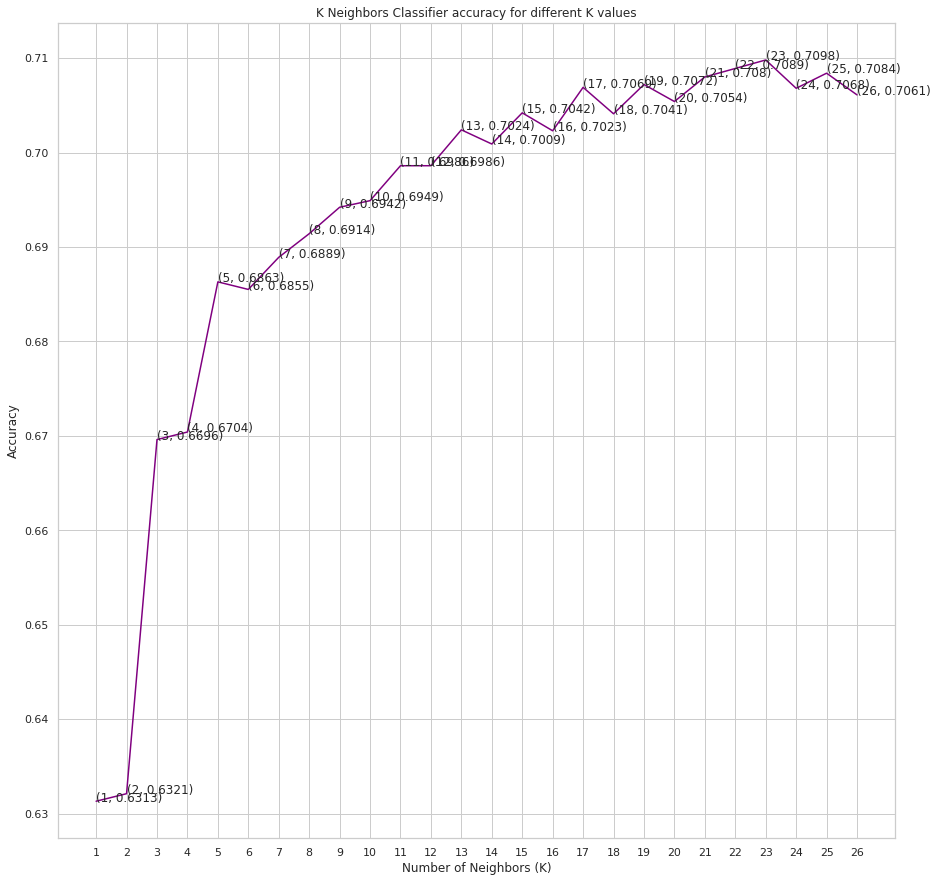

In [0]:
plt.figure(figsize=(15,15))
plt.plot([k for k in range(1, 27)], knn_accuracy, color = 'purple')
for i in range(1,27):
    plt.text(i, knn_accuracy[i-1], (i, knn_accuracy[i-1]))
plt.xticks([i for i in range(1, 27)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('K Neighbors Classifier accuracy for different K values')

In [0]:
knn_classifier_best = KNeighborsClassifier(n_neighbors = 23)
knn_classifier_best.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

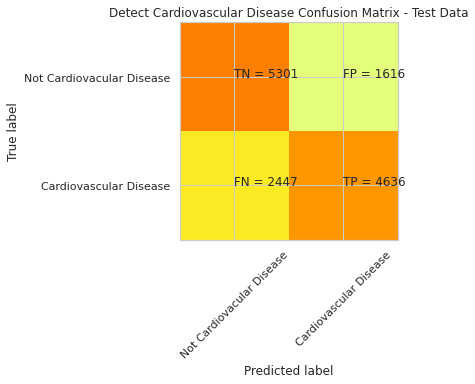

Accuracy on test set : 70.97857142857143


In [0]:
showConfusionMatrix(X_test,Y_test,knn_classifier_best)

In [0]:
print(classification_report(Y_test, DecsTree.predict(X_test), target_names=classNames))

                           precision    recall  f1-score   support

Not Cardiovacular Disease       0.70      0.81      0.75      6917
   Cardiovascular Disease       0.78      0.66      0.71      7083

                 accuracy                           0.73     14000
                macro avg       0.74      0.73      0.73     14000
             weighted avg       0.74      0.73      0.73     14000



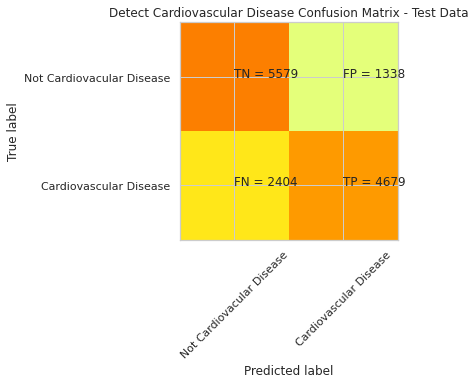

Accuracy on test set : 73.27142857142857


In [0]:
showConfusionMatrix(X_test,Y_test,DecsTree)

In [0]:
print(classification_report(Y_test, DecsTree.predict(X_test), target_names=classNames))

                           precision    recall  f1-score   support

Not Cardiovacular Disease       0.70      0.81      0.75      6917
   Cardiovascular Disease       0.78      0.66      0.71      7083

                 accuracy                           0.73     14000
                macro avg       0.74      0.73      0.73     14000
             weighted avg       0.74      0.73      0.73     14000



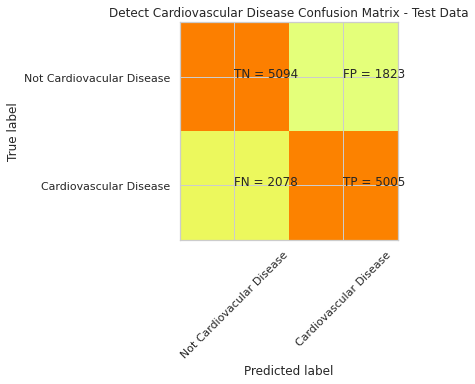

Accuracy on test set : 72.13571428571429


In [0]:
showConfusionMatrix(X_important_test,Y_test,clf_important)

In [0]:
print(classification_report(Y_test, clf_important.predict(X_important_test), target_names=classNames))

                           precision    recall  f1-score   support

Not Cardiovacular Disease       0.71      0.74      0.72      6917
   Cardiovascular Disease       0.73      0.71      0.72      7083

                 accuracy                           0.72     14000
                macro avg       0.72      0.72      0.72     14000
             weighted avg       0.72      0.72      0.72     14000



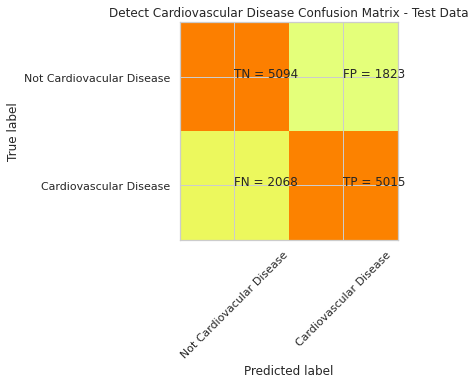

Accuracy on test set : 72.20714285714286


In [0]:
showConfusionMatrix(X_test,Y_test,clf)

In [0]:
print(classification_report(Y_test, clf.predict(X_test), target_names=classNames))

                           precision    recall  f1-score   support

Not Cardiovacular Disease       0.71      0.74      0.72      6917
   Cardiovascular Disease       0.73      0.71      0.72      7083

                 accuracy                           0.72     14000
                macro avg       0.72      0.72      0.72     14000
             weighted avg       0.72      0.72      0.72     14000



Random Forest kullanarak veritabanımızda özellik seçimi yaptık ve özellik sayısını 9'a düşürdük. 9 özelliği kullanma ve tüm özellikleri kullanma doğruluğunu Random Forest kullanarak karşılaştırdık.

Ancak, özellik seçiminin doğruluk değeri için etkili olduğunu söyleyemeyiz. Bu, diğer özelliklerin modelimiz için önemli olduğunu göstermektedir.

Çünkü önemli özelliklerle değerlendirdiğimizde, değerlendirdikten sonra doğruluğumuz 72.13, tüm özellikleri kullandığımızda doğruluk değerimiz 72.2'dir.

Decision tree algoritması yüzde 73 doğruluk oranı veriyor. Üç modelle çalıştık, ancak doğruluk oranı yüksek değil. Tüm modellerin confusion matrisine baktığımızda, FN(False Negatif) çok yüksektir. Bu, modelimizin geliştirilmesinin tamamlanmadığını gösterir.

Doğruluk oranını artırmak için farklı veri setleriyle bu problemi çözülmeye çalışılmalıdır. Çünkü veri tabanımızdaki tüm özellikleri kullandığımızda doğruluk oranı artıyor. Buna ek olarak, üç farklı modelde doğruluk oranının yaklaşık 70 olması, veritabanımızdaki özellik sayısının yetersiz olduğunu göstermektedir.

Kalp UCI hastalığı veritabanını kullanarak bu sorunu daha iyi çözebilir. Çünkü bu veritabanında 76 özellik var. Oluşturduğumuz modellerin bu sorunu çözmek için basit olduğunu düşünüyoruz. Bu nedenle, bu veri kümesini bu sorunu çözmek için kullanmalı ve biraz karmaşık bir model oluşturmalıyız.

Ayrıca, veritabanımızdaki tüm özelliklerin önemli olduğunu düşündükten sonra, tüm özellikleri kullanarak yüksek boyutlarda iyi sonuçlar veren destek vektör makinesi algoritmasını kullandık. Ancak bu algoritma çok uzun sürdüğü ve ram belleği çok fazla kullandığından, google collab'da bu işlemi tamamlayamadık.

## Referanslar<a class="anchor" id="references"></a>

In [0]:
https://towardsdatascience.com/predicting-presence-of-heart-diseases-using-machine-learning-36f00f3edb2c
https://www.quora.com/Why-is-SVM-so-slow
https://pdfs.semanticscholar.org/ee07/cb968a190a6a6f89bf4888bc5ef12034a8c4.pdf
http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.378.9860&rep=rep1&type=pdf
https://towardsdatascience.com/gini-impurity-measure-dbd3878ead33
https://nbviewer.jupyter.org/github/stevensmiley1989/Cleveland_Dataset/blob/master/Cleveland.ipynb
https://www.kaggle.com/sulianova/cardiovascular-disease-dataset
https://www.kaggle.com/ronitf/heart-disease-uci